# Exercise 4: How many clusters of grain?

In the video, you learnt how to choose a good number of clusters for a dataset using the k-means inertia graph.  You are given a dataset of the measurements of samples of grain.  What's a good number of clusters in this case?

This dataset was obtained from the [UCI](https://archive.ics.uci.edu/ml/datasets/seeds).

**Step 1:** Load the dataset _(written for you)_.

In [12]:
import pandas as pd

seeds_df = pd.read_csv('../datasets/seeds.csv')
# forget about the grain variety for the moment - we'll use this later
del seeds_df['grain_variety']

**Step 2:** Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [13]:
seeds_df.head(2)


,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956


**Step 3:** Extract the measurements from the DataFrame using its `.values` attribute:

In [15]:
samples = seeds_df.values

**Step 4:**  _(Written for you)_. Measure the quality of clusterings with different numbers of clusters using the
inertia.  For each of the given values of `k`, perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

In [16]:
from sklearn.cluster import KMeans

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

C:\Users\T430\anaconda3\envs\strive\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**Step 5:**  Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

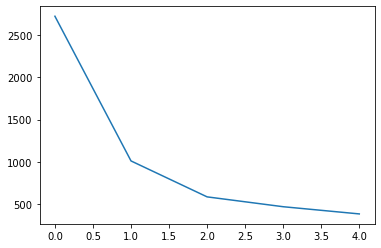

In [20]:
import matplotlib.pyplot as plt
plt.plot(inertias)

**Excellent work!** You can see from the graph that 3 is a good number of clusters, since these are points where the inertia begins to decrease more slowly.